## Lecture 6

In this demonstration, we will explore some components of clustering. Using a dataset about employee surveys, we will divide records into clusters based on shared attributes. 

In [1]:
# importing packages 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import cluster 
from sklearn import metrics

import helper_functions

# changing some settings

# import warnings
# warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)
plt.rcParams['figure.figsize'] = (8,6)

We will look at two approaches to clustering

- partitioning
- hierarchical 

Each approach will allow us to determine shared attributes of records. 

In [2]:
survey = pd.read_csv("survey.csv")
survey

,cycle,id,cs_python,cs_java,...,profile_6,profile_7,len_answer,experience
0,Summer,1,1,0,...,3,6,74,"None, I just finished my undergrad!"
1,Spring,2,1,1,...,3,8,597,"None, I just finished my undergrad!"
2,Fall,3,0,0,...,9,9,548,"5+ years, I'm a veteran!"
3,Spring,4,0,0,...,6,8,954,"5+ years, I'm a veteran!"
4,Fall,5,0,0,...,6,7,612,"2-5 years, I'm getting good at what I do!"
...,...,...,...,...,...,...,...,...,...
153,Spring,154,1,1,...,8,10,265,"5+ years, I'm a veteran!"
154,Summer,155,1,1,...,1,2,402,"None, I just finished my undergrad!"
155,Fall,156,1,1,...,1,5,555,"< 2 years, I'm fresh!"
156,Summer,157,1,0,...,1,4,0,"None, I just finished my undergrad!"


We will work with the dataset about employee surveys from Lecture 2. The survey asks employees to rank themselves on a scale of 1 to 10 on each of the following areas 

- Visualization 
- Computer Science
- Math 
- Statistics
- Machine Learning 
- Business
- Communication

In [3]:
survey = survey[['profile_{}'.format(k) for k in range(1,8)]]
survey.columns = ['Viz', 'CS', 'Math', 'Stats', 'ML', 'Bus', 'Com']
survey

,Viz,CS,Math,Stats,ML,Bus,Com
0,2,2,2,5,0,3,6
1,4,9,7,7,6,3,8
2,7,5,4,3,2,9,9
3,7,7,5,4,1,6,8
4,7,6,8,8,4,6,7
...,...,...,...,...,...,...,...
153,8,7,6,8,2,8,10
154,4,2,5,6,6,1,2
155,4,4,3,3,1,1,5
156,1,3,7,8,1,1,4


We can generate histograms to better understand the distributions of responses for each category.

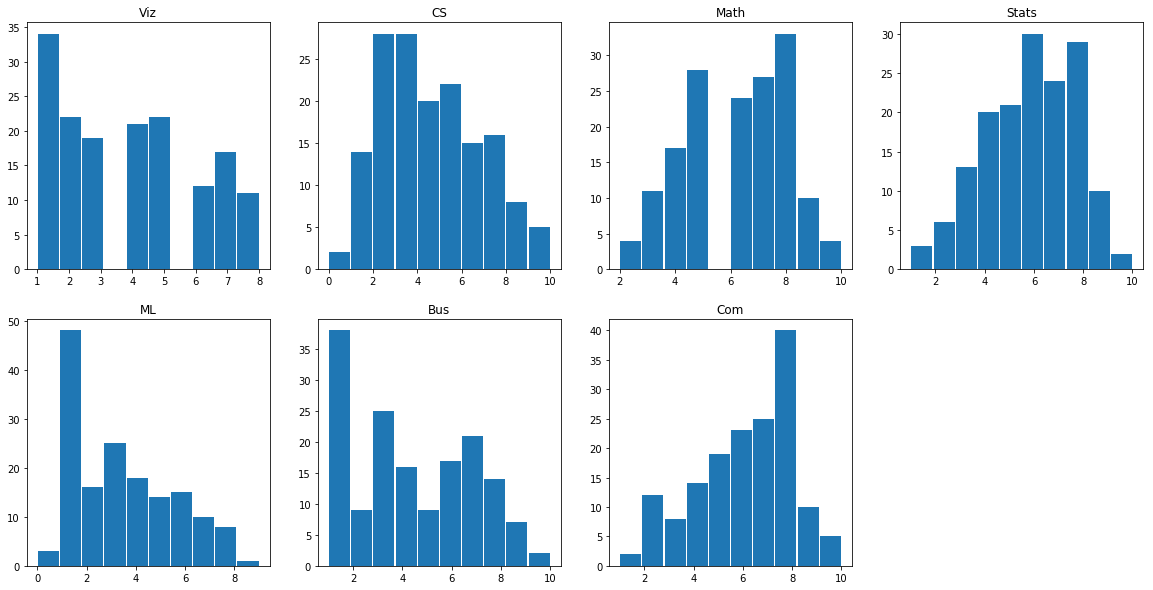

In [4]:
fig, axes = plt.subplots(2,4, figsize = (20,10))

for category, ax in zip(survey.columns, axes.flatten()[:-1]):
    ax.hist(survey[category], rwidth = 0.95)
    ax.set_title(category)

plt.delaxes(axes.flatten()[-1])    
    
plt.show();    

Note that some categories have comparable distributions like `Communication` and `Business`. We can examine the correlation between skills. Remember that correlation measures the association between two variables on a scale from -1 to 1. We nickname correlation as cosine score to remind us that correlation measures whether variables "point in the same direction"

- 1 : same direction 
- 0 : perpendicular 
- -1 : opposite direction 

We can compute the correlation between pairs of categories.

In [5]:
correlations = survey.corr()
correlations

,Viz,CS,Math,Stats,ML,Bus,Com
Viz,1.000000,0.282906,0.015144,0.270820,0.328538,0.437584,0.368496
CS,0.282906,1.000000,0.215316,0.101657,0.481906,0.107712,0.185016
Math,0.015144,0.215316,1.000000,0.670016,0.272858,-0.044132,-0.037995
Stats,0.270820,0.101657,0.670016,1.000000,0.321812,0.201824,0.114225
ML,0.328538,0.481906,0.272858,0.321812,1.000000,0.117302,0.083175
Bus,0.437584,0.107712,-0.044132,0.201824,0.117302,1.000000,0.589699
Com,0.368496,0.185016,-0.037995,0.114225,0.083175,0.589699,1.000000


Note that we have a positive correlation between the scores in

- `Math` and `Stats`
- `Bus` and `Com`
- `ML` and `CS`

We can display the correlations with a heat-map.

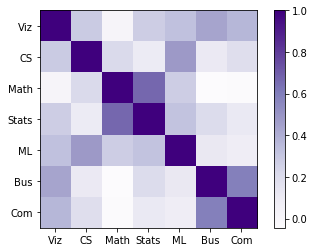

In [6]:
plt.imshow(correlations, cmap=plt.cm.Purples)
plt.colorbar()

plt.xticks(plt.gca().get_xticks()[1:-1], correlations.index)
plt.yticks(plt.gca().get_yticks()[1:-1], correlations.index);

Note that the both `Bus` and `Com` are nearly uncorrelated to `Math` and `Stats`. So we may have found two distinct clusters of employees `Bus`/`Com` and `Math`/`Stats`.

#### Partitioning

We can try a partitioning the employees into clusters with the k-means algorithm. 

In [7]:
number_of_clusters = 2
seed = 42

model = cluster.KMeans(n_clusters = number_of_clusters, random_state=seed)
model.fit(survey)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

We can fit the data to a model that implements the k-means algorithm with the `scikit-learn` package. Note that we have to specify the number of clusters $k$. 

In [8]:
survey_with_labels = survey.copy()
survey_with_labels["label"] = model.labels_
survey_with_labels

,Viz,CS,Math,Stats,ML,Bus,Com,label
0,2,2,2,5,0,3,6,1
1,4,9,7,7,6,3,8,0
2,7,5,4,3,2,9,9,0
3,7,7,5,4,1,6,8,0
4,7,6,8,8,4,6,7,0
...,...,...,...,...,...,...,...,...
153,8,7,6,8,2,8,10,0
154,4,2,5,6,6,1,2,1
155,4,4,3,3,1,1,5,1
156,1,3,7,8,1,1,4,1


Moreover we indicate a number for the argument `random_state` to have reproducible results. The `scikit-learn` package makes some random guesses. We want to obtain the same random guesses each time we run the code.

In [9]:
seed = 42
models = [cluster.KMeans(n_clusters = k, random_state=seed).fit(survey) for k in range(2,20)]

We can try different number of clusters to assess the partitioning of points.

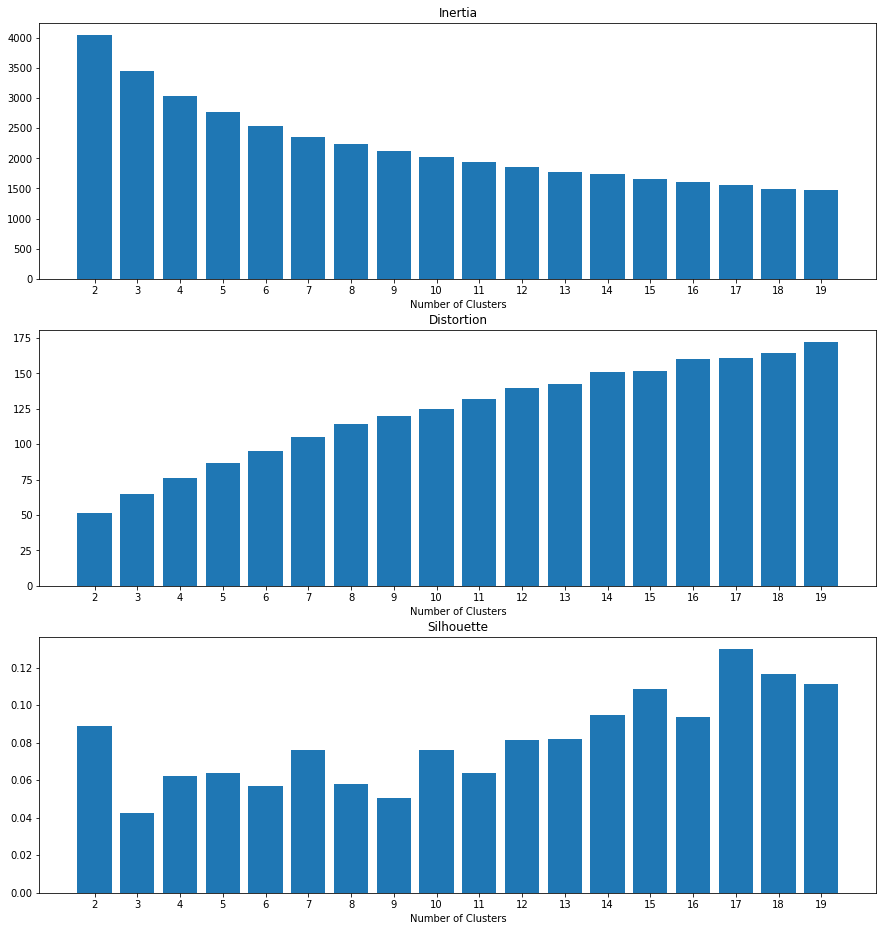

In [10]:
scores = [helper_functions.compute_metrics(model, survey) for model in models]
scores = list(zip(*scores))

fig, axes = plt.subplots(3,1,figsize=(15,16))

titles = ["Inertia", "Distortion", "Silhouette"]
for score, ax, title in zip(scores, axes.flatten(), titles):
    ax.bar(range(2,20), score)
    ax.set_xticks(range(2,20))
    ax.set_xlabel("Number of Clusters")
    ax.set_title(title)

We can see that increasing $k$ tends to decrease the inertia and increase the distortion. However the silhouette score does not increase. 

We can use the "elbow method" for determining a value of $k$. We inspect the bar-chart. We identify $k$ where the heights of the bars start to flatten out. 

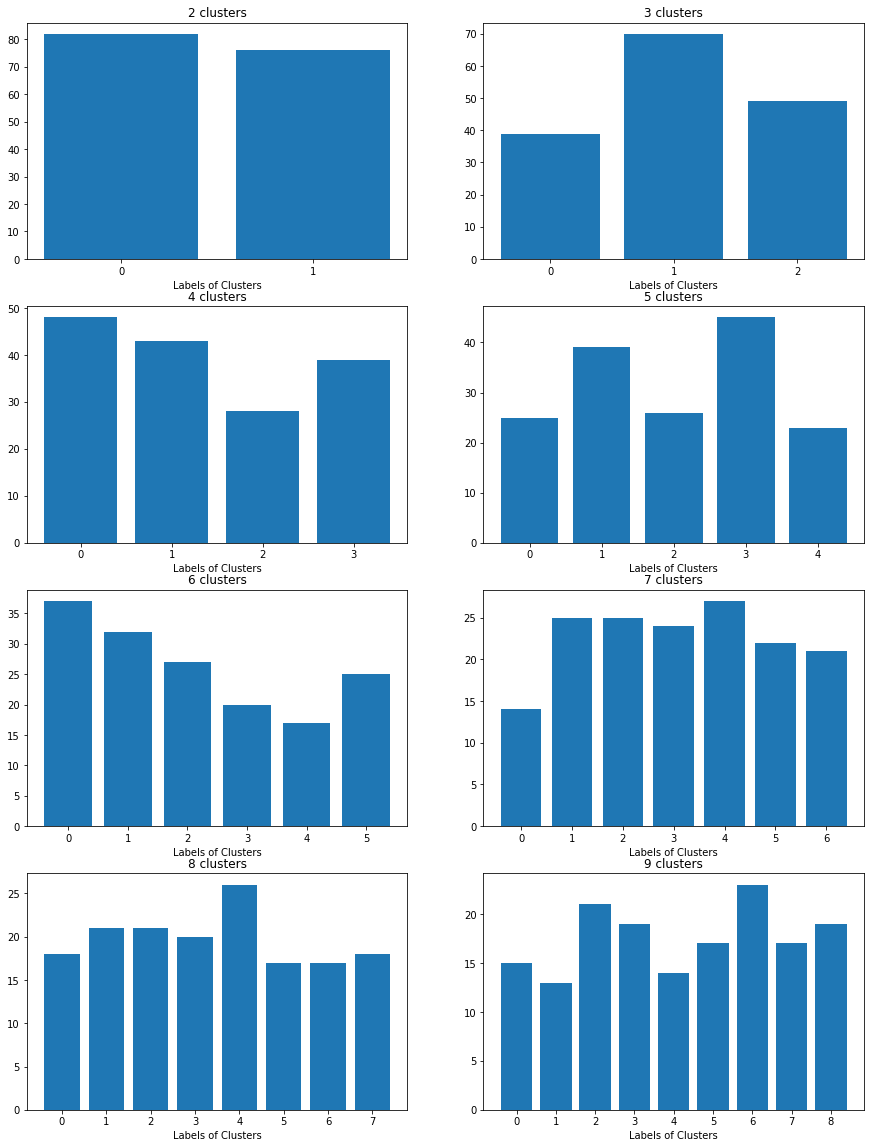

In [11]:
fig, axes = plt.subplots(4,2,figsize=(15,20))

for model, ax in zip(models[:8], axes.flatten()):
    values, counts = np.unique(model.labels_, return_counts=True)
    ax.bar(values, counts)
    ax.set_xticks(values)
    ax.set_xlabel("Labels of Clusters")
    ax.set_title(f"{model.n_clusters} clusters")

While the "elbow method" might suggest 9 clusters, we find that we have roughly the same number of points in the 9 clusters. It would be challenging to interpret 9 clusters. Instead we will choose 4 clusters to have interpretible partition of points.

In [12]:
center = survey.mean()
center

Viz      3.848101
CS       4.158228
Math     6.177215
Stats    5.879747
ML       3.354430
Bus      4.329114
Com      6.164557
dtype: float64

We can compute the center of all points. 

In [13]:
model = models[2]
model.cluster_centers_

array([[2.9375    , 4.77083333, 7.125     , 6.47916667, 3.72916667,
        2.04166667, 5.08333333],
       [4.95348837, 3.6744186 , 5.44186047, 5.88372093, 2.46511628,
        7.11627907, 7.60465116],
       [5.82142857, 6.46428571, 7.39285714, 7.42857143, 6.64285714,
        6.10714286, 7.32142857],
       [2.33333333, 2.28205128, 4.94871795, 4.02564103, 1.51282051,
        2.79487179, 5.07692308]])

We can compare the centers of the clusters to the center of all points.

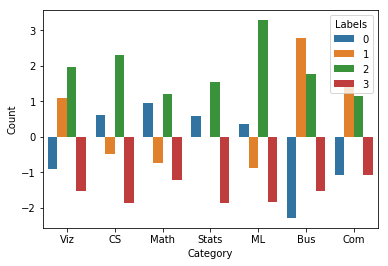

In [14]:
helper_functions.generate_chart_coordinates(model, survey)

For each cluster, we have plotted the coordinates of the difference between the center of the cluster and the center of all points. We can interpret the chart.

- Cluster 0 has experience in `CS`/`ML` and `Math`/`Stats`
- Cluster 1 has experience in `Bus`/`Viz`/`Com`
- Cluster 2 has experience in all categories
- Cluster 3 lacks experience in all categories

Note that cluster 0 captures the positively correlated categories `CS`/`ML` and `Math`/`Stats`. Note that cluster 1 captures the positively correlated categories `Bus`/`Viz`/`Com`.

If we wanted to have diverse skills on the teams, then we would have equal numbers from each cluster. The bar-chart tells us the extent an employee in a cluster differs from an average employee. 

#### Hierarchical 

Since we did not have an improvement in the silhouette score with k-means, we can try another approach to clustering. We will use agglomerative clustering with complete linkage.


In [21]:
model = cluster.AgglomerativeClustering(n_clusters = 4)
model.fit(survey)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func='deprecated')

Remember that complete linkage means we measure the distance between point clouds as the maximum distance between points in the two point clouds.

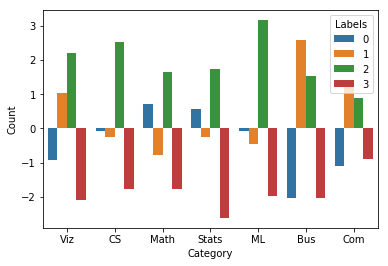

In [16]:
helper_functions.generate_chart_coordinates(model, survey)

Again we can compare an employee in a cluster to the average employee. By inspecting the difference in coordinates between the center of the cluster and the center for all points, we can identify the strengths and weaknesses of the clusters.

- Cluster 0 has experience in all categories
- Cluster 1 has experience in `Bus`/`Viz`/`Com`
- Cluster 2 has experience in `Math`/`Stats`
- Cluster 3 lacks experience in all categories
        
So we loss a cluster with above average experience in `CS`/`ML`.

In [17]:
metrics.silhouette_score(survey, model.labels_)

0.14796395728266934

With k-means clustering, we had a silhoutte score of 0.06 for 4 clusters. Switching to agglomerative clustering, we have improved the silhouette score to 0.14. 

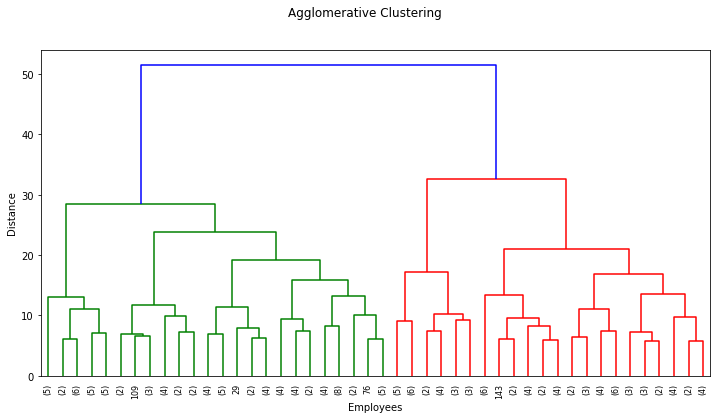

In [18]:
links = helper_functions.generate_dendrogram(survey)

We can generate a dendrogram to show the merging of clusters in the agglomerative algorithm. Note that the chart does not show clusters separated by distance less than 5. 

In [26]:
links[:5,:]

array([[ 35.        , 157.        ,   1.73205081,   2.        ],
       [ 92.        , 130.        ,   1.73205081,   2.        ],
       [ 16.        , 121.        ,   1.73205081,   2.        ],
       [ 13.        , 110.        ,   1.73205081,   2.        ],
       [128.        , 142.        ,   1.73205081,   2.        ]])

<p>We have a record of the merging of clusters
<ul>
    <li>Before we start the algorithm, each employee is assigned to her own cluster with a label 0,...,157. Remember we have 158 employees</li>
    <li>We record each iteration in a row</li>
        <ul>
            <li>The ith row corresponds to a merged cluster with label 158+i</li>
            <li>The 0th and 1st columns of the ith row are the two clusters merged to form cluster (n+i)</li>
            <li>The 2nd column of the ith row is the distance between the clusters</li>
            <li>The 4th column of the ith row indicates the number of points in the merged cluster (n+i)</li>
        </ul>
</ul>

In the 0th row, the algorithm merges employee 35 and 157 to make cluster 158. Next the algorithm merges employee 92 and 130 to make cluster 159. 

In [32]:
links[72]

array([158.        , 159.        ,   3.74165739,   4.        ])

At the 72nd iteration, the algorithm merges cluster 158 and 159. We find that the clusters are a distance 3.74 apart.